# Import Library yang Digunakan

In [304]:
# import library yang digunakan

import pandas as pd 
import string
import re
import nltk

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from indoNLP.preprocessing import replace_slang, replace_word_elongation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob, download_corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt


download_corpora.download_all()

# stopwords removal
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwords_id = stopwords.words('indonesian')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\LARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\LARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\LARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\LARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

## Import Dataset

In [279]:
data_df =  pd.read_csv('./youtube_comments.csv')
data_df.head()

,author,published_time,likes,comment,isPublic
0,@ferryirwandi,2024-10-10T09:02:59Z,4729,"hallo warga sipil sekalian, selamat menonton",True
1,@udinaja5394,2025-04-11T22:47:18Z,0,prestasi menteri pendidikan LGBT ala barat,True
2,@anisafiqriyah8612,2025-04-10T06:09:05Z,0,Semoga Mentri Pendidikan periode ini bisa meng...,True
3,@MuhammadAmin-yt8sd,2025-04-09T15:59:13Z,0,"Jgn ngerokok bos, minimal di video ngga keliat...",True
4,@faridfarid-kv2il,2025-04-09T01:56:26Z,0,Gen produk nadiem😅😅😅,True


## Menilai Data

In [280]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12142 entries, 0 to 12141
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   author          12139 non-null  object
 1   published_time  12142 non-null  object
 2   likes           12142 non-null  int64 
 3   comment         12142 non-null  object
 4   isPublic        12142 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 391.4+ KB


In [281]:
data_df.describe(include='all')

,author,published_time,likes,comment,isPublic
count,12139,12142,12142.000000,12142,12142
unique,11470,11997,NaN,12096,1
top,@LLLLlll__0000,2024-10-11T03:06:20Z,NaN,😢,True
freq,131,3,NaN,9,12142
mean,NaN,NaN,5.991929,NaN,NaN
std,NaN,NaN,187.515345,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [282]:
# melihat missing value
data_df.isnull().sum()

author            3
published_time    0
likes             0
comment           0
isPublic          0
dtype: int64

In [283]:
# melihat data duplikat
data_df[data_df.duplicated(subset='comment')]

,author,published_time,likes,comment,isPublic
501,@IbnurizkiPeratama,2024-12-13T00:28:36Z,0,Pasti yang nonton orang pintar,True
723,@SandiSotoy,2024-11-19T23:12:15Z,0,😢,True
905,@yohanaana3542,2024-11-10T10:39:48Z,0,BICARA PENDIDIKAN KO SAMBIL MEROKOK GOBLOK KAM...,True
907,@yohanaana3542,2024-11-10T10:32:09Z,0,BICARA PENDIDIKAN KO SAMBIL MEROKOK GOBLOK KAM...,True
981,@John_667,2024-11-08T13:25:17Z,1,"yg bego nya itu, dlu waktu sd 1 kelas yg pinta...",True
1507,@dedekdy,2024-10-31T22:20:15Z,0,😢,True
1891,@arifplow5205,2024-10-28T13:18:01Z,0,Miris ya 😢,True
1903,@xamppphpblog9769,2024-10-28T11:30:49Z,0,Menurut aku.. indo zona pemalas.. Jadi ? Intin...,True
2409,@rahmadaf_,2024-10-25T11:55:02Z,0,😢,True
2635,@triasbahdin3941,2024-10-24T04:22:09Z,0,kita bakalan kehilangan banyak analis kedepan ...,True


In [284]:
# menghapus comment duplikat
data_df = data_df.drop_duplicates(subset='comment')

In [285]:
# melihat jumlah data setelah duplikasi di hapus
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12096 entries, 0 to 12141
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   author          12093 non-null  object
 1   published_time  12096 non-null  object
 2   likes           12096 non-null  int64 
 3   comment         12096 non-null  object
 4   isPublic        12096 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 484.3+ KB


- tidak ditemukan missing value pada hasil scraping comment
- terdapat beberapa data duplikat pada kolom 'comment' 

## Data Cleaning

In [286]:
# copy data
cleaned_df = data_df.copy()
cleaned_df.head()

,author,published_time,likes,comment,isPublic
0,@ferryirwandi,2024-10-10T09:02:59Z,4729,"hallo warga sipil sekalian, selamat menonton",True
1,@udinaja5394,2025-04-11T22:47:18Z,0,prestasi menteri pendidikan LGBT ala barat,True
2,@anisafiqriyah8612,2025-04-10T06:09:05Z,0,Semoga Mentri Pendidikan periode ini bisa meng...,True
3,@MuhammadAmin-yt8sd,2025-04-09T15:59:13Z,0,"Jgn ngerokok bos, minimal di video ngga keliat...",True
4,@faridfarid-kv2il,2025-04-09T01:56:26Z,0,Gen produk nadiem😅😅😅,True


### Text Pre-processing

In [287]:
# fungsi untuk membersihkan teks
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

# case folding
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # Memecah teks menjadi daftar kata
    words = text.split()
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [288]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
cleaned_df['text_clean'] = cleaned_df['comment'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
cleaned_df['text_casefoldingText'] = cleaned_df['text_clean'].apply(casefoldingText)

# menangani slang dan bacaan panjang
cleaned_df['text_slangwords'] = cleaned_df['text_casefoldingText'].apply(replace_slang)
cleaned_df['text_casefoldingText'] = cleaned_df['text_casefoldingText'].apply(replace_word_elongation)

# tokenisasi teks
cleaned_df['text_tokenizingText'] = cleaned_df['text_slangwords'].apply(tokenizingText)

# menghapus stopwords
cleaned_df['text_stopword'] = cleaned_df['text_tokenizingText'].apply(filteringText)

# menggabungkan token menjadi kalimat
cleaned_df['text_akhir'] = cleaned_df['text_stopword'].apply(toSentence)

In [289]:
cleaned_df.head()

,author,published_time,likes,comment,isPublic,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,@ferryirwandi,2024-10-10T09:02:59Z,4729,"hallo warga sipil sekalian, selamat menonton",True,hallo warga sipil sekalian selamat menonton,hallo warga sipil sekalian selamat menonton,halo warga sipil sekalian selamat menonton,"[halo, warga, sipil, sekalian, selamat, menonton]","[halo, warga, sipil, selamat, menonton]",halo warga sipil selamat menonton
1,@udinaja5394,2025-04-11T22:47:18Z,0,prestasi menteri pendidikan LGBT ala barat,True,prestasi menteri pendidikan LGBT ala barat,prestasi menteri pendidikan lgbt ala barat,prestasi menteri pendidikan lgbt ala barat,"[prestasi, menteri, pendidikan, lgbt, ala, barat]","[prestasi, menteri, pendidikan, lgbt, ala, barat]",prestasi menteri pendidikan lgbt ala barat
2,@anisafiqriyah8612,2025-04-10T06:09:05Z,0,Semoga Mentri Pendidikan periode ini bisa meng...,True,Semoga Mentri Pendidikan periode ini bisa meng...,semoga mentri pendidikan periode ini bisa meng...,semoga mentri pendidikan periode ini bisa meng...,"[semoga, mentri, pendidikan, periode, ini, bis...","[semoga, mentri, pendidikan, periode, mengubah...",semoga mentri pendidikan periode mengubah sist...
3,@MuhammadAmin-yt8sd,2025-04-09T15:59:13Z,0,"Jgn ngerokok bos, minimal di video ngga keliat...",True,Jgn ngerokok bos minimal di video ngga keliata...,jgn ngerokok bos minimal di video ngga keliata...,jangan ngerokok bos minimal di video enggak ke...,"[jangan, ngerokok, bos, minimal, di, video, en...","[ngerokok, bos, minimal, video, lu, perokok, l...",ngerokok bos minimal video lu perokok lu idola...
4,@faridfarid-kv2il,2025-04-09T01:56:26Z,0,Gen produk nadiem😅😅😅,True,Gen produk nadiem,gen produk nadiem,gen produk nadiem,"[gen, produk, nadiem]","[gen, produk, nadiem]",gen produk nadiem


In [290]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity  # Nilai antara -1 (negatif) dan 1 (positif)

# Terapkan pada DataFrame
cleaned_df['sentiment'] = cleaned_df['text_akhir'].apply(get_sentiment)
cleaned_df['sentiment_label'] = cleaned_df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
cleaned_df.head(20)

,author,published_time,likes,comment,isPublic,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,sentiment,sentiment_label
0,@ferryirwandi,2024-10-10T09:02:59Z,4729,"hallo warga sipil sekalian, selamat menonton",True,hallo warga sipil sekalian selamat menonton,hallo warga sipil sekalian selamat menonton,halo warga sipil sekalian selamat menonton,"[halo, warga, sipil, sekalian, selamat, menonton]","[halo, warga, sipil, selamat, menonton]",halo warga sipil selamat menonton,0.0,neutral
1,@udinaja5394,2025-04-11T22:47:18Z,0,prestasi menteri pendidikan LGBT ala barat,True,prestasi menteri pendidikan LGBT ala barat,prestasi menteri pendidikan lgbt ala barat,prestasi menteri pendidikan lgbt ala barat,"[prestasi, menteri, pendidikan, lgbt, ala, barat]","[prestasi, menteri, pendidikan, lgbt, ala, barat]",prestasi menteri pendidikan lgbt ala barat,0.0,neutral
2,@anisafiqriyah8612,2025-04-10T06:09:05Z,0,Semoga Mentri Pendidikan periode ini bisa meng...,True,Semoga Mentri Pendidikan periode ini bisa meng...,semoga mentri pendidikan periode ini bisa meng...,semoga mentri pendidikan periode ini bisa meng...,"[semoga, mentri, pendidikan, periode, ini, bis...","[semoga, mentri, pendidikan, periode, mengubah...",semoga mentri pendidikan periode mengubah sist...,0.0,neutral
3,@MuhammadAmin-yt8sd,2025-04-09T15:59:13Z,0,"Jgn ngerokok bos, minimal di video ngga keliat...",True,Jgn ngerokok bos minimal di video ngga keliata...,jgn ngerokok bos minimal di video ngga keliata...,jangan ngerokok bos minimal di video enggak ke...,"[jangan, ngerokok, bos, minimal, di, video, en...","[ngerokok, bos, minimal, video, lu, perokok, l...",ngerokok bos minimal video lu perokok lu idola...,-0.1,negative
4,@faridfarid-kv2il,2025-04-09T01:56:26Z,0,Gen produk nadiem😅😅😅,True,Gen produk nadiem,gen produk nadiem,gen produk nadiem,"[gen, produk, nadiem]","[gen, produk, nadiem]",gen produk nadiem,0.0,neutral
5,@nothingimportant1125,2025-04-08T00:51:18Z,0,Pemerintah salah tapi rakyatnya juga ga mau ko...,True,Pemerintah salah tapi rakyatnya juga ga mau ko...,pemerintah salah tapi rakyatnya juga ga mau ko...,pemerintah salah tapi rakyatnya juga enggak ma...,"[pemerintah, salah, tapi, rakyatnya, juga, eng...","[pemerintah, salah, rakyatnya, pakai, otaknya,...",pemerintah salah rakyatnya pakai otaknya belaj...,0.0,neutral
6,@nanaseriku2362,2025-04-07T17:20:35Z,0,Salahnya bukan di sistemnya tapi penerapannya....,True,Salahnya bukan di sistemnya tapi penerapannya ...,salahnya bukan di sistemnya tapi penerapannya ...,salahnya bukan di sistemnya tapi penerapannya ...,"[salahnya, bukan, di, sistemnya, tapi, penerap...","[salahnya, sistemnya, penerapannya, buktinya, ...",salahnya sistemnya penerapannya buktinya sekol...,0.0,neutral
7,@clairetrytche,2025-04-07T13:30:25Z,1,"<a href=""https://www.youtube.com/watch?v=1qDL8...",True,a href sumpah itu SMA gw kayanya malu bangettt,a href sumpah itu sma gw kayanya malu banget,a href sumpah itu sama gue kayanya malu banget,"[a, href, sumpah, itu, sama, gue, kayanya, mal...","[href, sumpah, gue, kayanya, malu, banget]",href sumpah gue kayanya malu banget,0.0,neutral
8,@ayikpramandu6526,2025-04-05T15:52:43Z,0,"koreksi bang,. soundmu kadang bikin kaget",True,koreksi bang soundmu kadang bikin kaget,koreksi bang soundmu kadang bikin kaget,koreksi bang soundmu kadang bikin kaget,"[koreksi, bang, soundmu, kadang, bikin, kaget]","[koreksi, bang, soundmu, kadang, bikin, kaget]",koreksi bang soundmu kadang bikin kaget,0.0,neutral
9,@hdpro609,2025-04-05T05:07:07Z,0,"Teorinya 1000, prakteknya 0, pejabat di Indone...",True,Teorinya prakteknya pejabat di Indonesia ban...,teorinya prakteknya pejabat di indonesia ban...,teorinya prakteknya pejabat di indonesia ban...,"[teorinya, prakteknya, pejabat, di, indonesia,...","[teorinya, prakteknya, pejabat, indonesia, kor...",teorinya prakteknya pejabat indonesia korupsi,0.0,neutral


## Eksplorasi Label

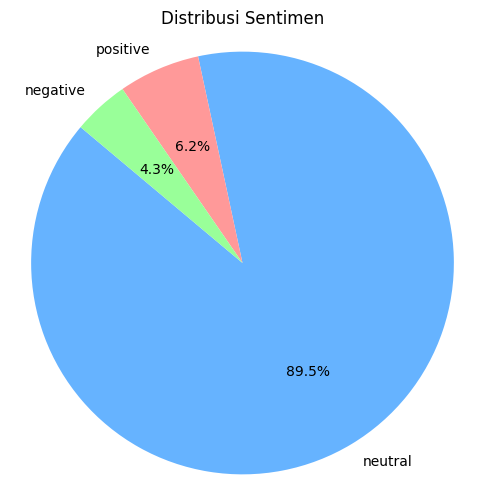

In [ ]:

# Hitung jumlah masing-masing label
sentiment_counts = cleaned_df['sentiment_label'].value_counts()

# Buat pie chart
colors = ['#66b3ff', '#ff9999', '#99ff99'] 
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribusi Sentimen')
plt.axis('equal')  
plt.show()


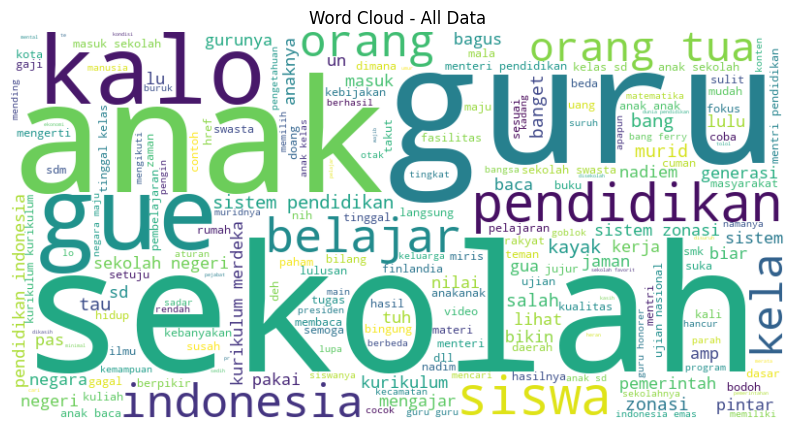

In [297]:
# membuat word cloud untuk semua data
all_text = ' '.join(cleaned_df['text_akhir'])
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title("Word Cloud - All Data")
plt.axis('off')
plt.show()

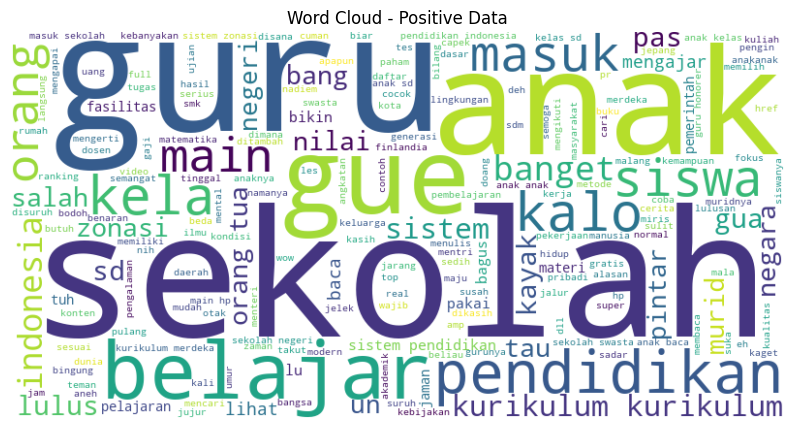

In [298]:
# membuat word cloud untuk data positif
positive_text = ' '.join(cleaned_df[cleaned_df['sentiment_label'] == 'positive']['text_akhir'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Word Cloud - Positive Data")
plt.axis('off')
plt.show()

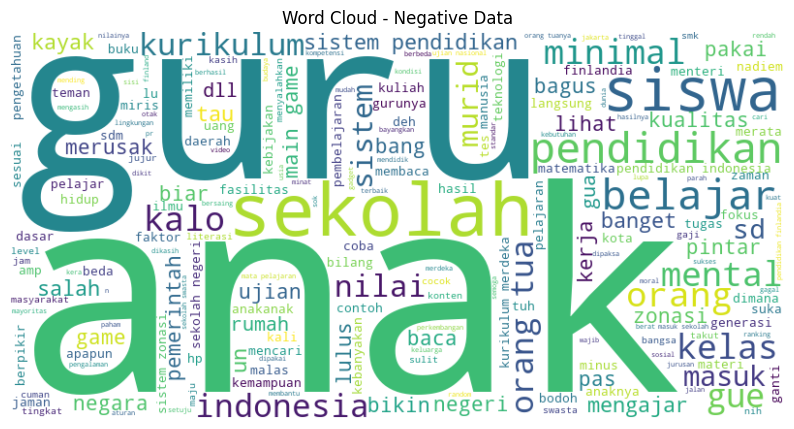

In [299]:
# Word cloud untuk data negatif
negative_text = ' '.join(cleaned_df[cleaned_df['sentiment_label'] == 'negative']['text_akhir'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Word Cloud - Negative Data")
plt.axis('off')
plt.show()

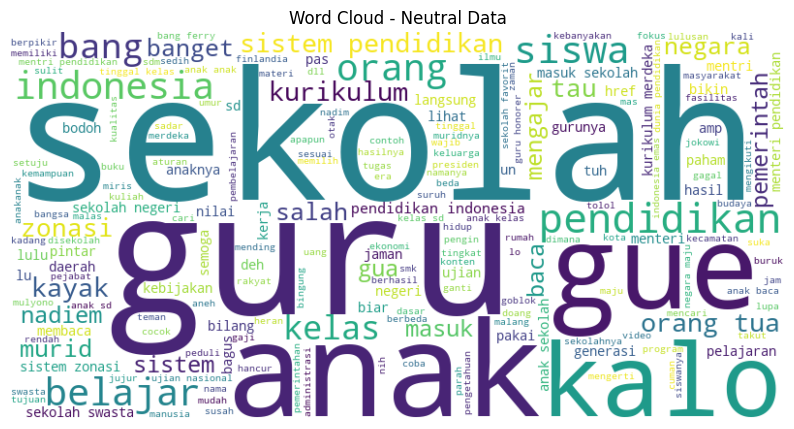

In [300]:
# Word cloud untuk data netral
neutral_text = ' '.join(cleaned_df[cleaned_df['sentiment_label'] == 'neutral']['text_akhir'])
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title("Word Cloud - Neutral Data")
plt.axis('off')
plt.show()

c:\DBS Coding Camp\tugas\nlp-proyek-pertama\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


          word  count
16     sekolah   4507
14  pendidikan   4227
0         anak   4192
6         guru   3457
17      sistem   2406
13       orang   2343
7    indonesia   2222
5          gue   2096
9        kelas   2005
4      belajar   1830
10   kurikulum   1629
18       siswa   1569
8         kalo   1532
19      zonasi   1351
2         bang   1345
11       masuk   1319
1         baca   1301
12      negeri   1169
15          sd   1122
3       banget   1082


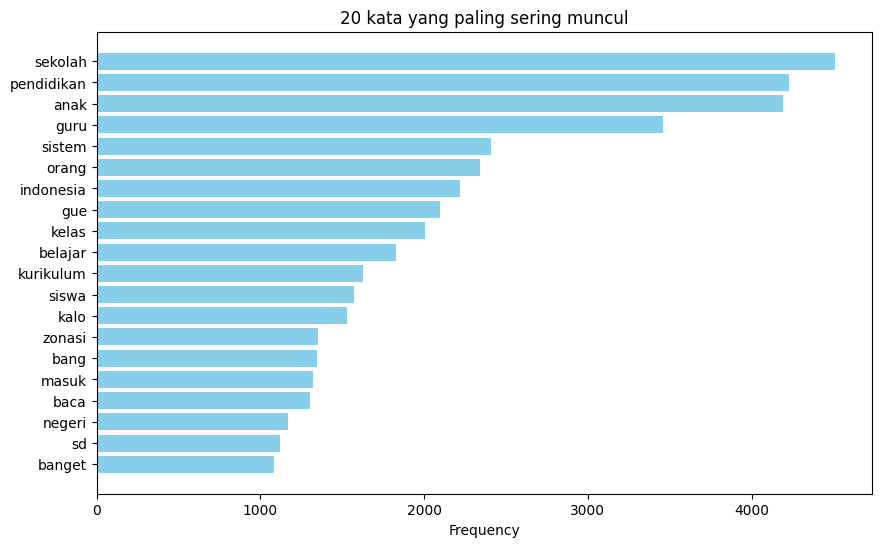

In [311]:
vectorizer = CountVectorizer(stop_words=stopwords_id, max_features=20)
X_tfidf = vectorizer.fit_transform(cleaned_df['text_akhir'])

# Mengambil fitur kata dan jumlah kemunculannya
words = vectorizer.get_feature_names_out()
word_counts = X_tfidf.toarray().sum(axis=0)

# Membuat DataFrame 
word_freq_df = pd.DataFrame({
    'word': words,
    'count': word_counts
})

# Mengurutkan berdasarkan frekuensi kata
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Menampilkan 20 kata dengan frekuensi tertinggi
print(word_freq_df.head(20))

plt.figure(figsize=(10, 6))
plt.barh(word_freq_df['word'], word_freq_df['count'], color='skyblue')  # Menampilkan 20 kata
plt.xlabel('Frequency')
plt.title('20 kata yang paling sering muncul')
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar kata dengan frekuensi tertinggi ada di atas
plt.show()


## Modeling 